# Main Library

In [1]:
# Reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

# Building Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# XGBoost
import xgboost as xgb

# Building Neural Network
import tensorflow as tf
import tensorflow.keras as k

In [2]:
data_1 = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Binary Classification with a Tabular Credit Card Fraud Dataset\train.csv")
data_2 = pd.read_csv(r"D:\Courses language programming\5_Machine Learning\Dataset For Machine Learning\Credit_card\creditcard.csv")

test = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Binary Classification with a Tabular Credit Card Fraud Dataset\test.csv")
test_id = test["id"]

In [3]:
data_1.head(2)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0


In [4]:
data_2.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [5]:
data_1.drop(columns='id', axis=1, inplace=True)
test.drop(columns='id', axis=1, inplace=True)

In [6]:
data_1.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0


In [7]:
data = pd.concat([data_1, data_2], axis=0)

data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0


In [8]:
data_1.shape[0]+ data_2.shape[0],   data.shape

(503936, (503936, 31))

In [9]:
data["Class"].value_counts()

Class
0    502975
1       961
Name: count, dtype: int64

In [10]:
data = data.astype("float32")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503936 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    503936 non-null  float32
 1   V1      503936 non-null  float32
 2   V2      503936 non-null  float32
 3   V3      503936 non-null  float32
 4   V4      503936 non-null  float32
 5   V5      503936 non-null  float32
 6   V6      503936 non-null  float32
 7   V7      503936 non-null  float32
 8   V8      503936 non-null  float32
 9   V9      503936 non-null  float32
 10  V10     503936 non-null  float32
 11  V11     503936 non-null  float32
 12  V12     503936 non-null  float32
 13  V13     503936 non-null  float32
 14  V14     503936 non-null  float32
 15  V15     503936 non-null  float32
 16  V16     503936 non-null  float32
 17  V17     503936 non-null  float32
 18  V18     503936 non-null  float32
 19  V19     503936 non-null  float32
 20  V20     503936 non-null  float32
 21  V21     503936 

In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,...,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000,503936.000000
mean,80709.367188,0.041748,0.021022,0.257467,0.030123,-0.070250,0.058132,-0.055756,0.065023,-0.021019,...,-0.013508,-0.022112,-0.021973,-0.001301,0.053922,0.004297,0.006103,0.007528,78.787689,0.001907
std,42643.929688,1.737016,1.458284,1.394117,1.347956,1.257180,1.279143,1.076737,1.017223,1.079777,...,0.618773,0.673554,0.514815,0.600224,0.478842,0.478634,0.340299,0.271052,212.986588,0.043627
min,0.000000,-56.407509,-72.715729,-48.325588,-5.683171,-113.743309,-26.160505,-43.557243,-73.216721,-13.434067,...,-34.830383,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430084,0.000000,0.000000
25%,50820.000000,-0.880606,-0.586816,-0.480148,-0.816585,-0.769531,-0.709470,-0.599563,-0.160195,-0.672632,...,-0.213589,-0.511654,-0.168840,-0.344343,-0.244944,-0.323298,-0.063601,-0.040745,5.780000,0.000000
50%,72003.000000,0.070138,0.057322,0.442081,0.015920,-0.125826,-0.197022,-0.026751,0.066014,-0.085679,...,-0.037407,-0.010937,-0.037602,0.039538,0.084789,-0.069929,0.008855,0.017327,21.990000,0.000000
75%,117290.000000,1.240875,0.808367,1.172820,0.838141,0.504006,0.442586,0.492008,0.361205,0.591630,...,0.150355,0.449516,0.101558,0.416490,0.376431,0.245055,0.082377,0.072070,73.489998,0.000000
max,172792.000000,2.454930,22.057730,9.382559,16.875343,34.801666,73.301628,120.589493,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519588,3.517346,31.612198,33.847809,25691.160156,1.000000


# Information For Data
#### All Columns is Average Between (0, 120) With out Time, Amount
#### Make Normalization For Two Colums (Time, Amount)

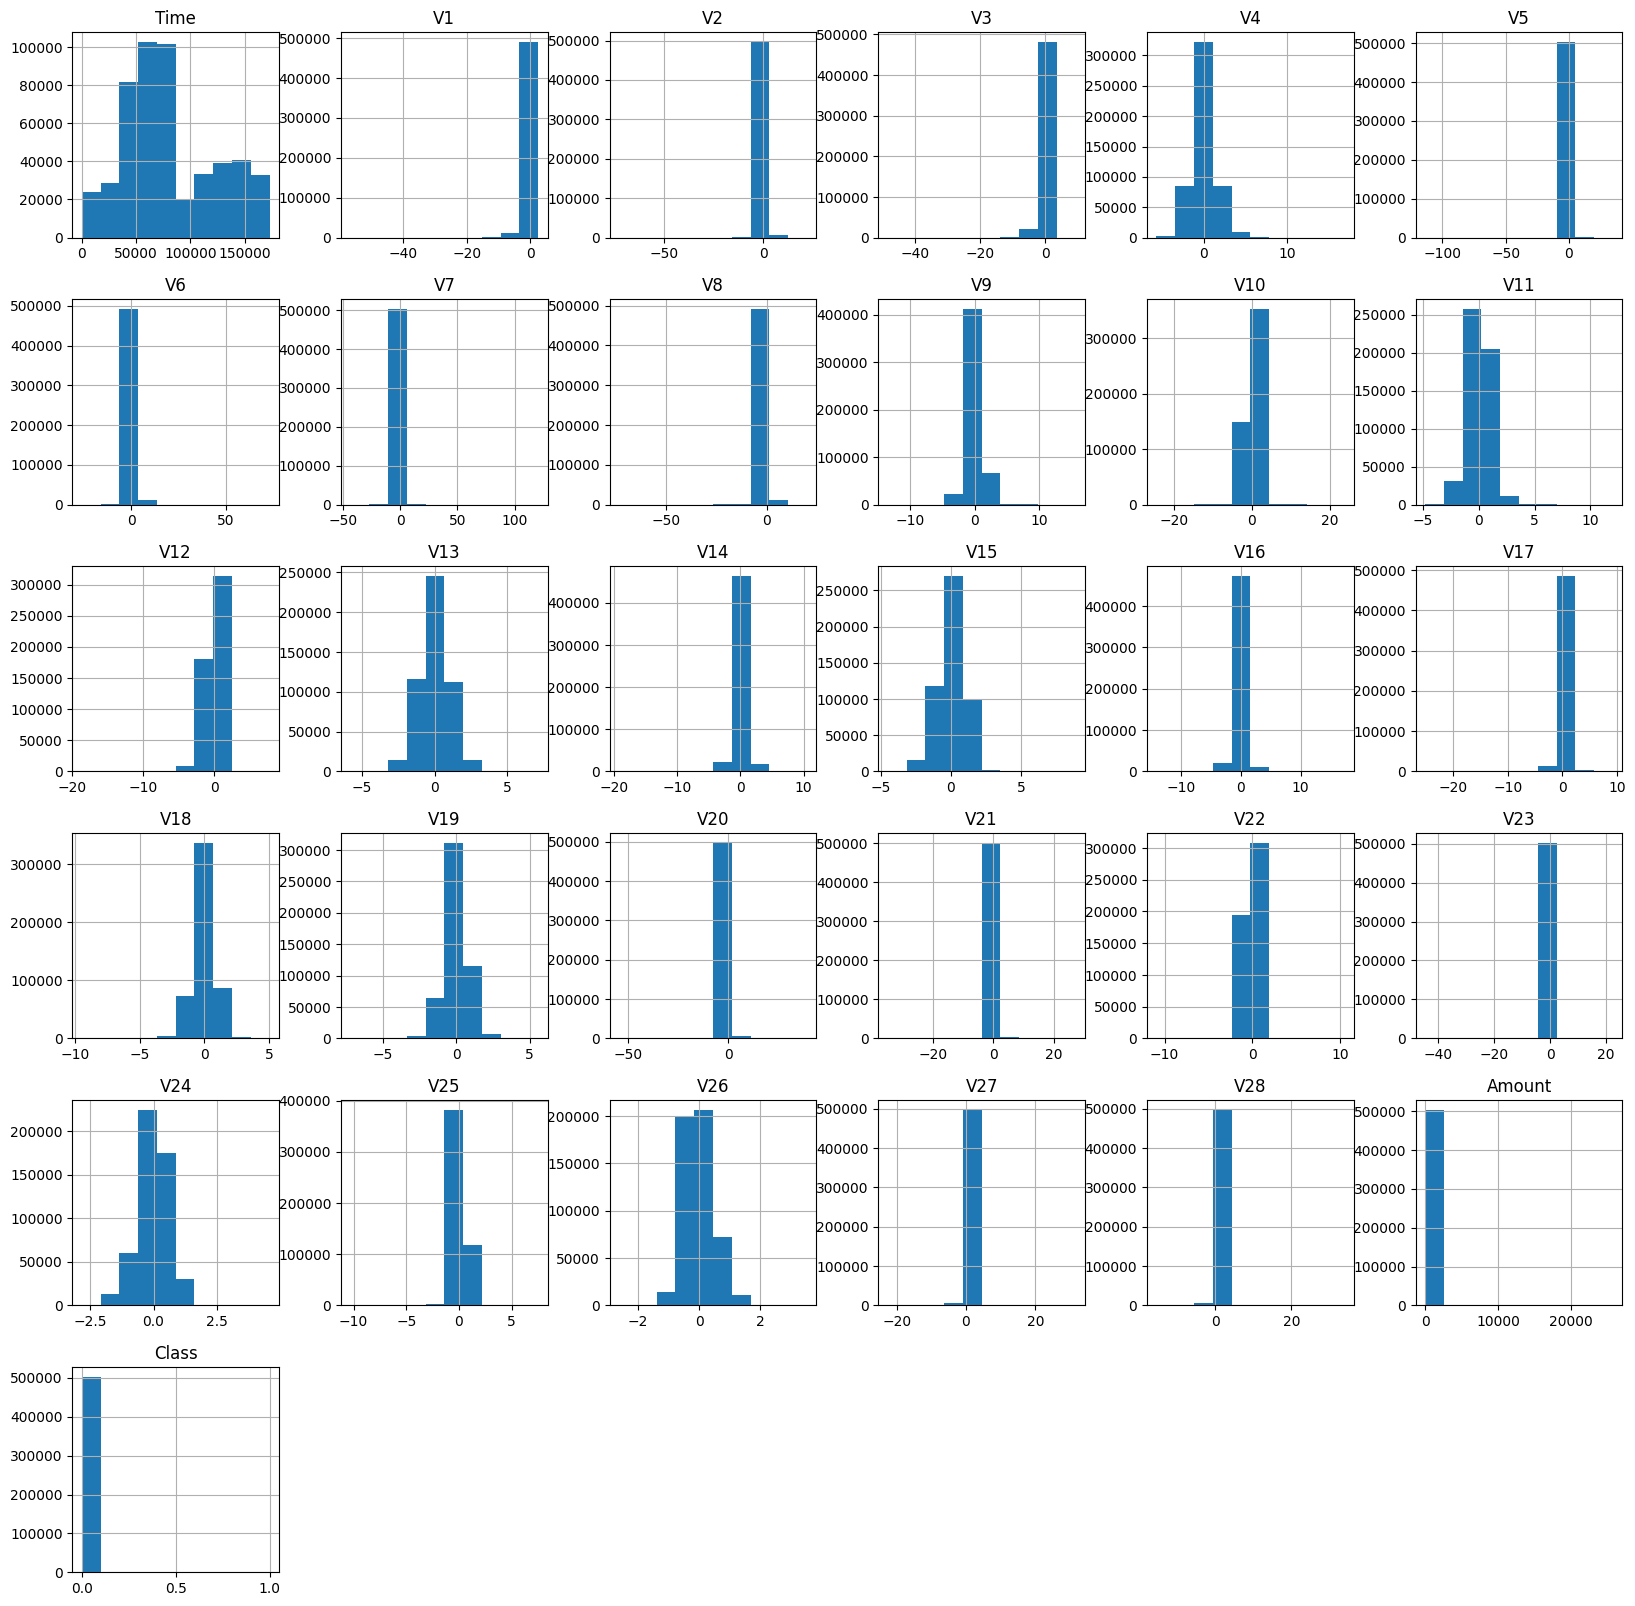

In [13]:
data.hist(figsize=(20, 20));

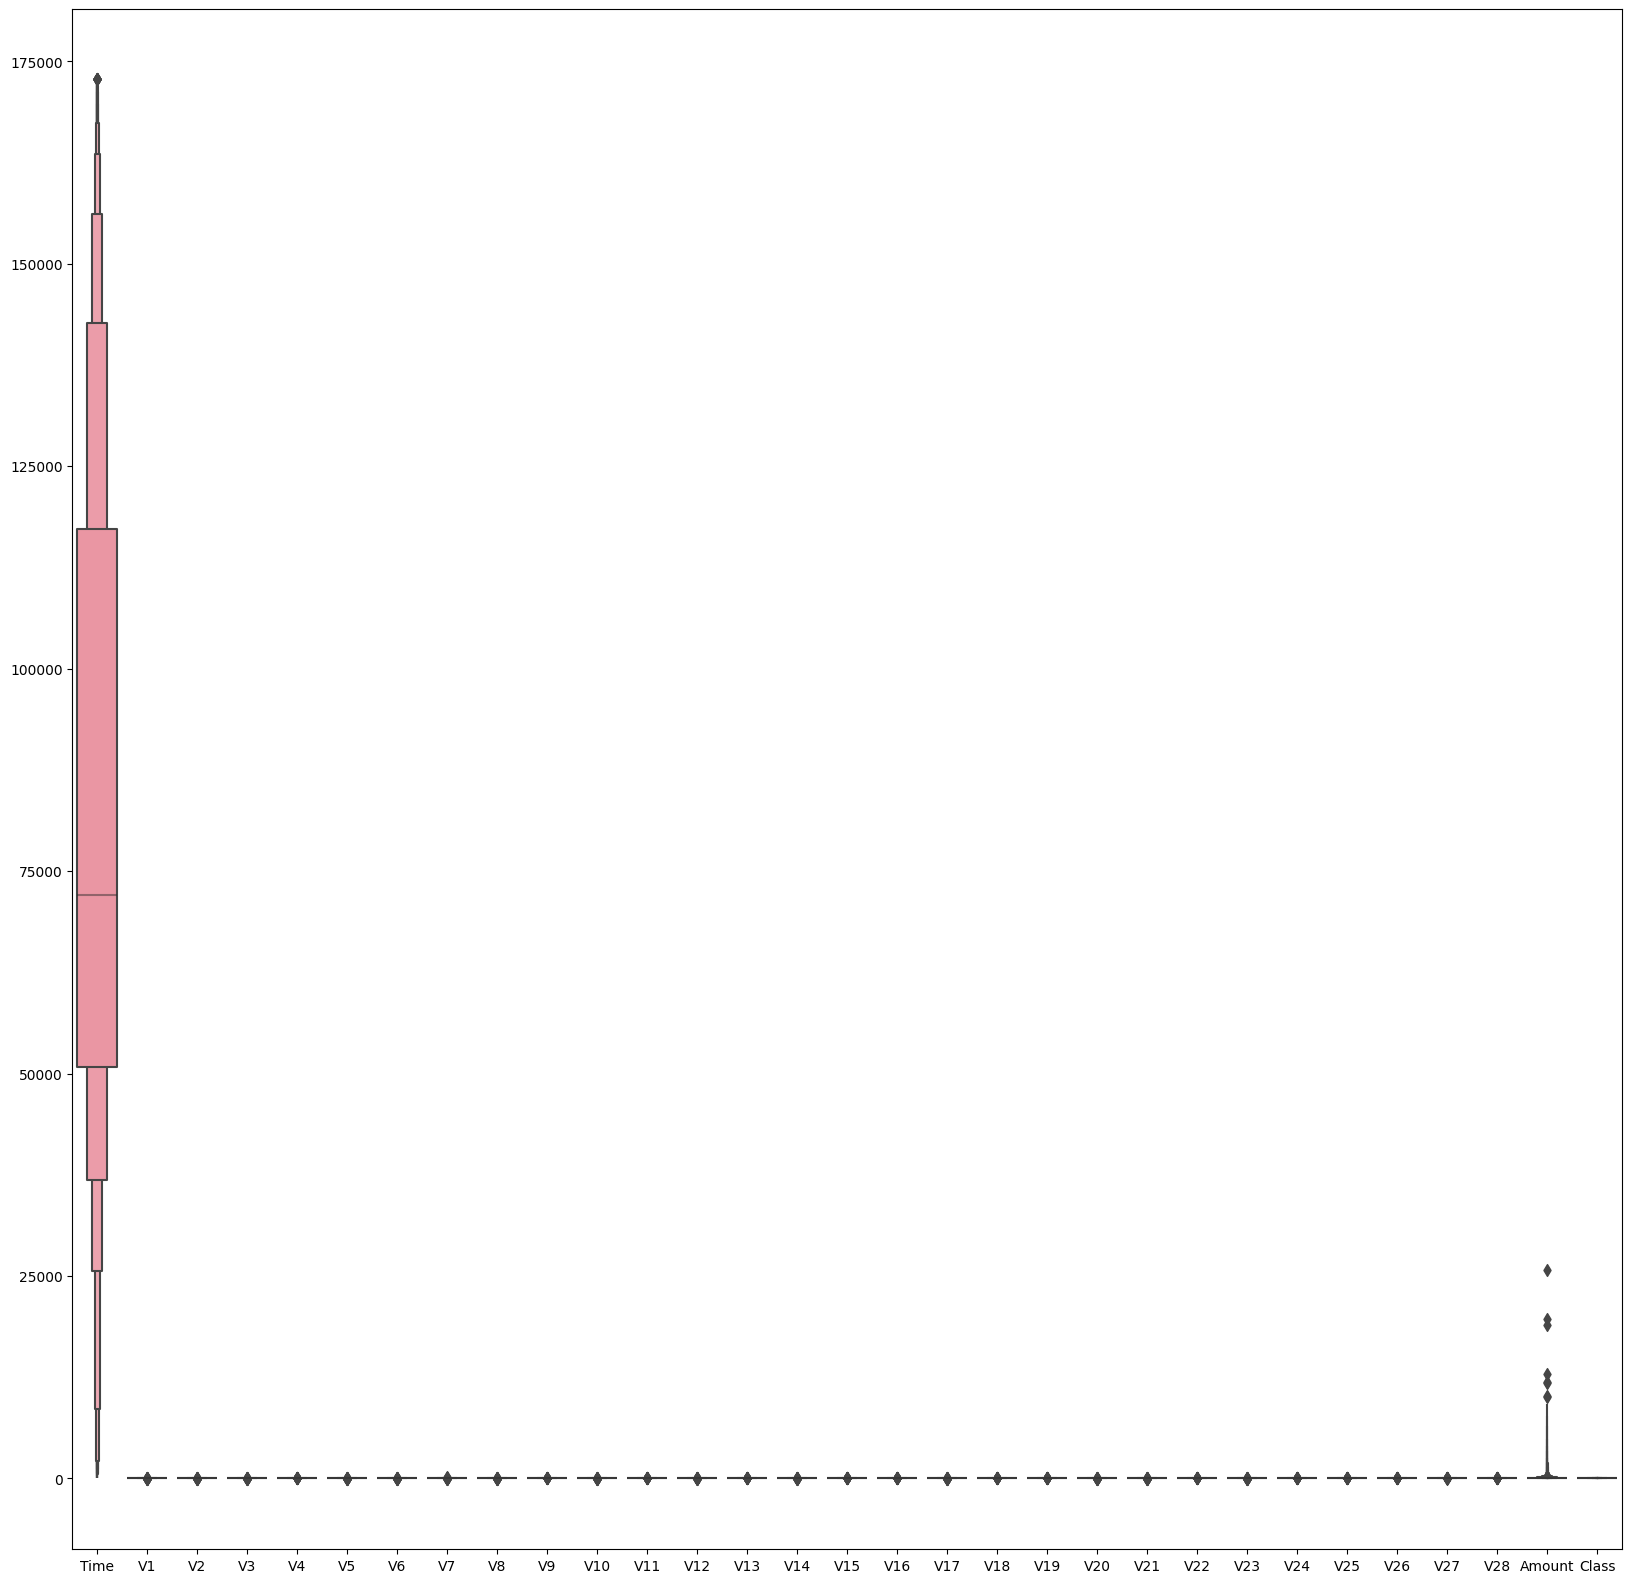

In [14]:
plt.figure(figsize=(20, 20))
sns.boxenplot(data);

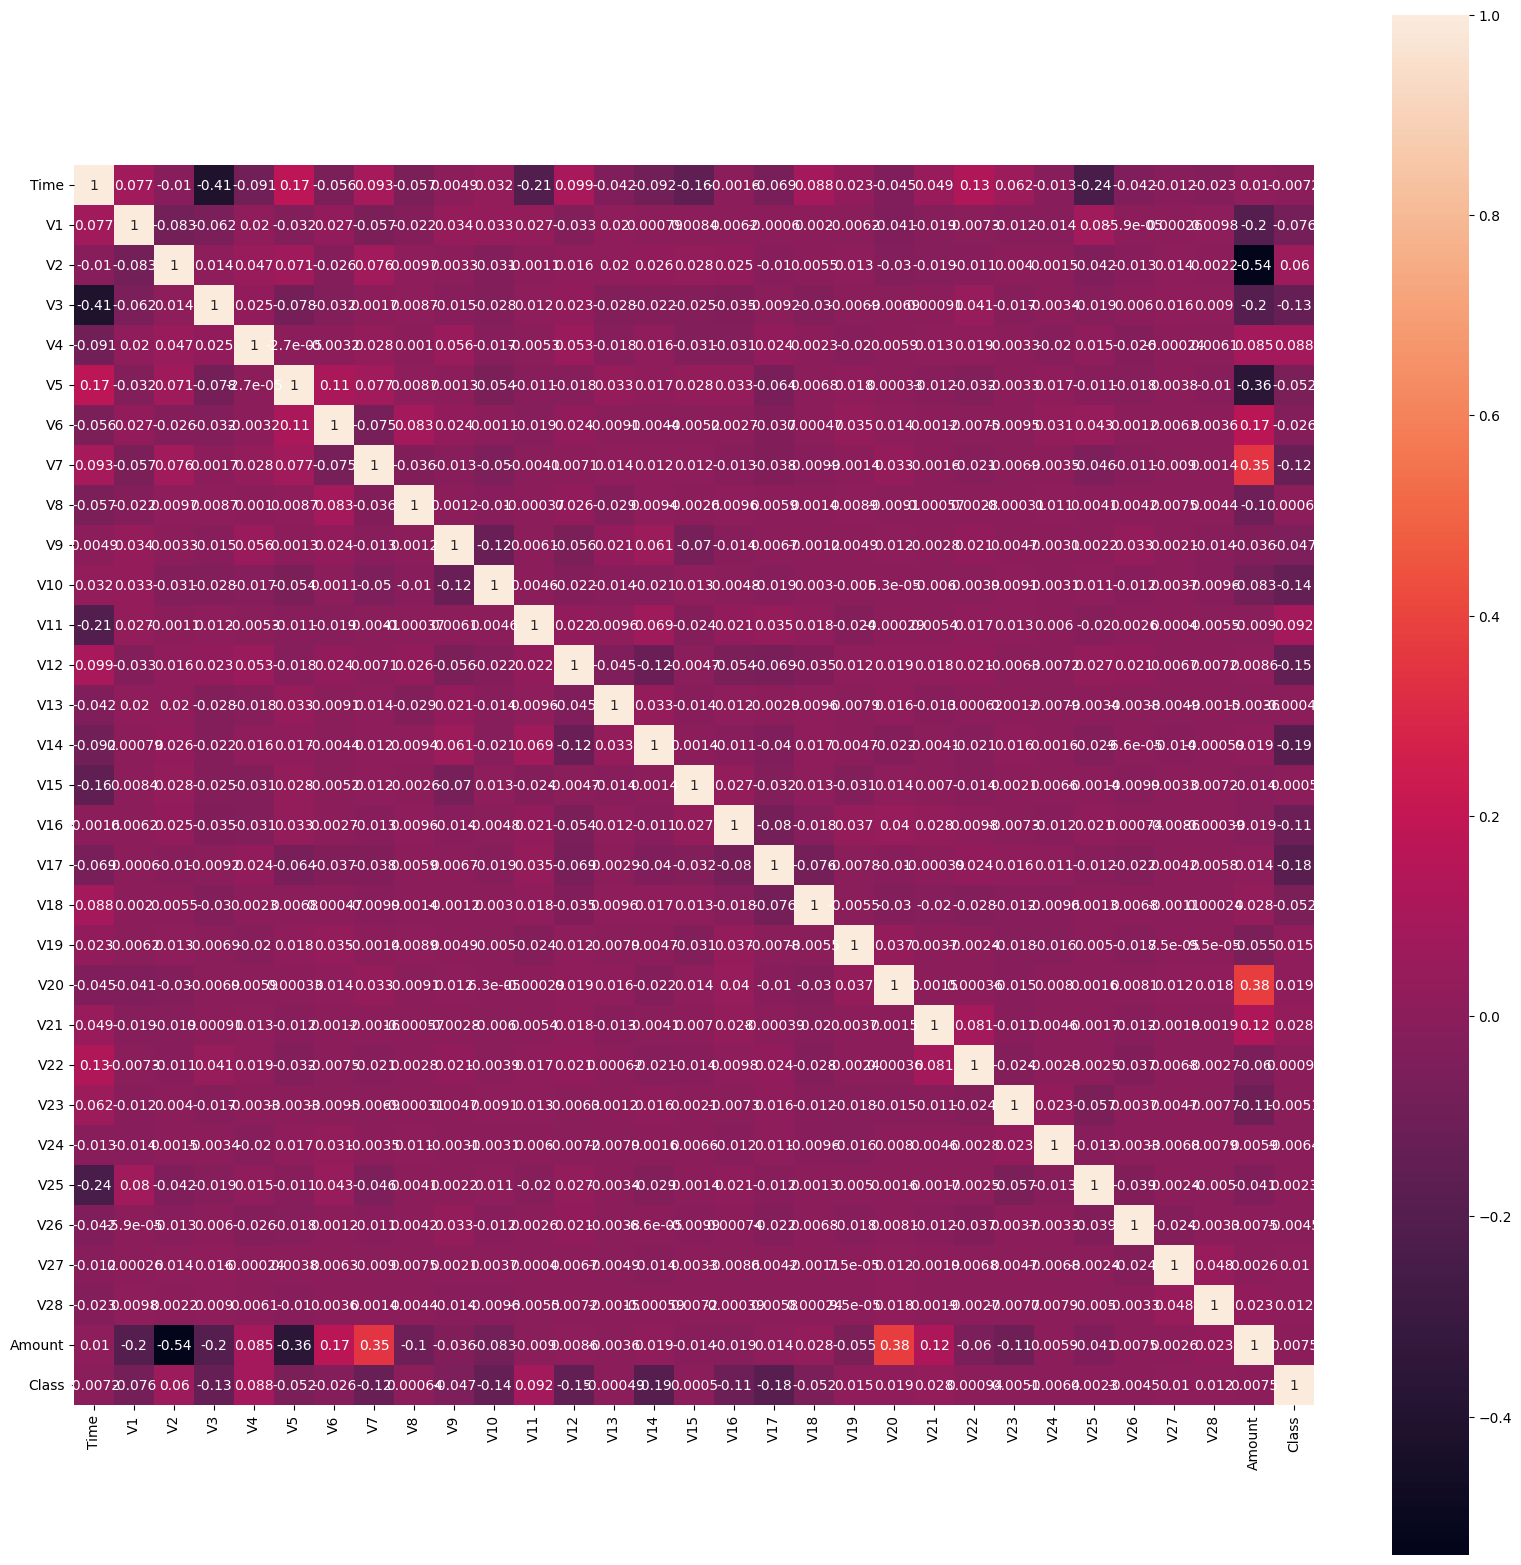

In [15]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), square=True, annot=True);

In [16]:
for col in data.columns:
    sns.displot(data[col]);

In [16]:
data.shape

(503936, 31)

# Make Over Sampling

In [17]:
X_2 = data.drop(columns="Class", axis=1)
Y_2 = data["Class"]

In [18]:
smote = SMOTE()
print(data[data["Class"]==0].shape[0], data[data["Class"]==1].shape[0])

new_x1, new_y1 = smote.fit_resample(X_2, Y_2)

new_data_Smote = pd.DataFrame(pd.concat([new_x1, new_y1], axis=1))

502975 961


In [19]:
print(new_data_Smote[new_data_Smote["Class"]==0].shape[0], new_data_Smote[new_data_Smote["Class"]==1].shape[0])

502975 502975


In [20]:
new_data_Smote["Class"].value_counts()

Class
0.0    502975
1.0    502975
Name: count, dtype: int64

In [21]:
X = new_data_Smote.drop(columns="Class", axis=1)
Y  = new_data_Smote["Class"]

# Make Normalization

In [23]:
MMS = MinMaxScaler()
new_x = MMS.fit_transform(X)
test = MMS.fit_transform(test)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(new_x, Y, train_size=0.7, random_state=42)

# Make Splitting Data

In [18]:
# X = data.drop(columns="Class", axis=1)
# Y  = data["Class"]

# x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# Building Model ==> Without OverSampling

## Model 1 ==> LogisticRegression


In [25]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(x_train, y_train)

train_prediction = log_reg.predict(x_train)
print(f"The accuracy_score of training is ==> {log_reg.score(x_train, y_train)}")
print(f"The accuracy_score of testing is ==> {log_reg.score(x_test, y_test)}")

The accuracy_score of training is ==> 0.8618036965767967
The accuracy_score of testing is ==> 0.8619447619994367


## Model 2 ==> RandomForestClassifier

In [26]:
model_RF = RandomForestClassifier(n_estimators=40, max_depth=10)
model_RF.fit(x_train, y_train)

train_prediction_RF = model_RF.predict(x_train)

print(f"The accuracy_score of training is ==> {model_RF.score(x_train, y_train)}")
print(f"The accuracy_score of testing is ==> {model_RF.score(x_test, y_test)}")

The accuracy_score of training is ==> 0.9067974125382545
The accuracy_score of testing is ==> 0.9058203688056067


## Model 3 ==> AdaBoostClassifier

In [27]:
Adaboost_reg = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=100, 
                                                                        min_samples_split=8,
                                                                        min_samples_leaf=4, 
                                                                        random_state=42),
                              n_estimators=5,
                              learning_rate=1)


Adaboost_reg.fit(x_train, y_train)

print(f"The predict Score Train is ==> {Adaboost_reg.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {Adaboost_reg.score(x_test, y_test)}")

The predict Score Train is ==> 1.0
%----------------------------------------------------------%
The predict Score Test is ==> 0.9988899382010371


## Model 4 ==> XGBClassifier

In [28]:
model_xgb = xgb.XGBClassifier(n_estimators=20, max_depth=10,
                             learning_rate=1,
                             min_child_weight=1)
                             
model_xgb.fit(x_train, y_train)

print(f"The predict Score Train is ==> {model_xgb.score(x_train, y_train)}")
print("%----------------------------------------------------------%")
print(f"The predict Score Test is ==> {model_xgb.score(x_test, y_test)}")

The predict Score Train is ==> 0.9997898219877444
%----------------------------------------------------------%
The predict Score Test is ==> 0.9977102904385573


# Make Submition

In [29]:
pred = Adaboost_reg.predict_proba(test)[:,1]
pred = pred.astype("float64")

In [30]:
pred

array([3.00021363e-13, 5.47741759e-07, 9.21111232e-04, ...,
       7.39548643e-04, 2.22044605e-16, 2.40839618e-13])

In [31]:
new_data_submiition = pd.DataFrame({"id": test_id.values,
                                   "Class": pred})

In [32]:
new_data_submiition.head()

,id,Class
0,219129,3.000214e-13
1,219130,5.477418e-07
2,219131,9.211112e-04
3,219132,4.053817e-10
4,219133,4.452893e-01


In [33]:
new_data_submiition.to_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Competitions\Binary Classification with a Tabular Credit Card Fraud Dataset\submit.csv", index=False)